## Colab Notebook
## Execute this jupyter notebook in the google colab

In [1]:
!nvidia-smi

Fri Jan 10 12:26:45 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 20.6 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="yGg4Bhi0YV195b7yIPai")
project = rf.workspace("aprendizajemaquinas-j8lnx").project("carnivore-and-herbivore-animals")
version = project.version(10)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Carnivore-and-Herbivore-animals-10 in yolov11:: 100%|██████████| 1426/1426 [00:00<00:00, 4541.73it/s]


In [7]:
dataset.location

'/content/Carnivore-and-Herbivore-animals-10'

In [8]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 81.9MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Carnivore-and-Herbivore-animals-10/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

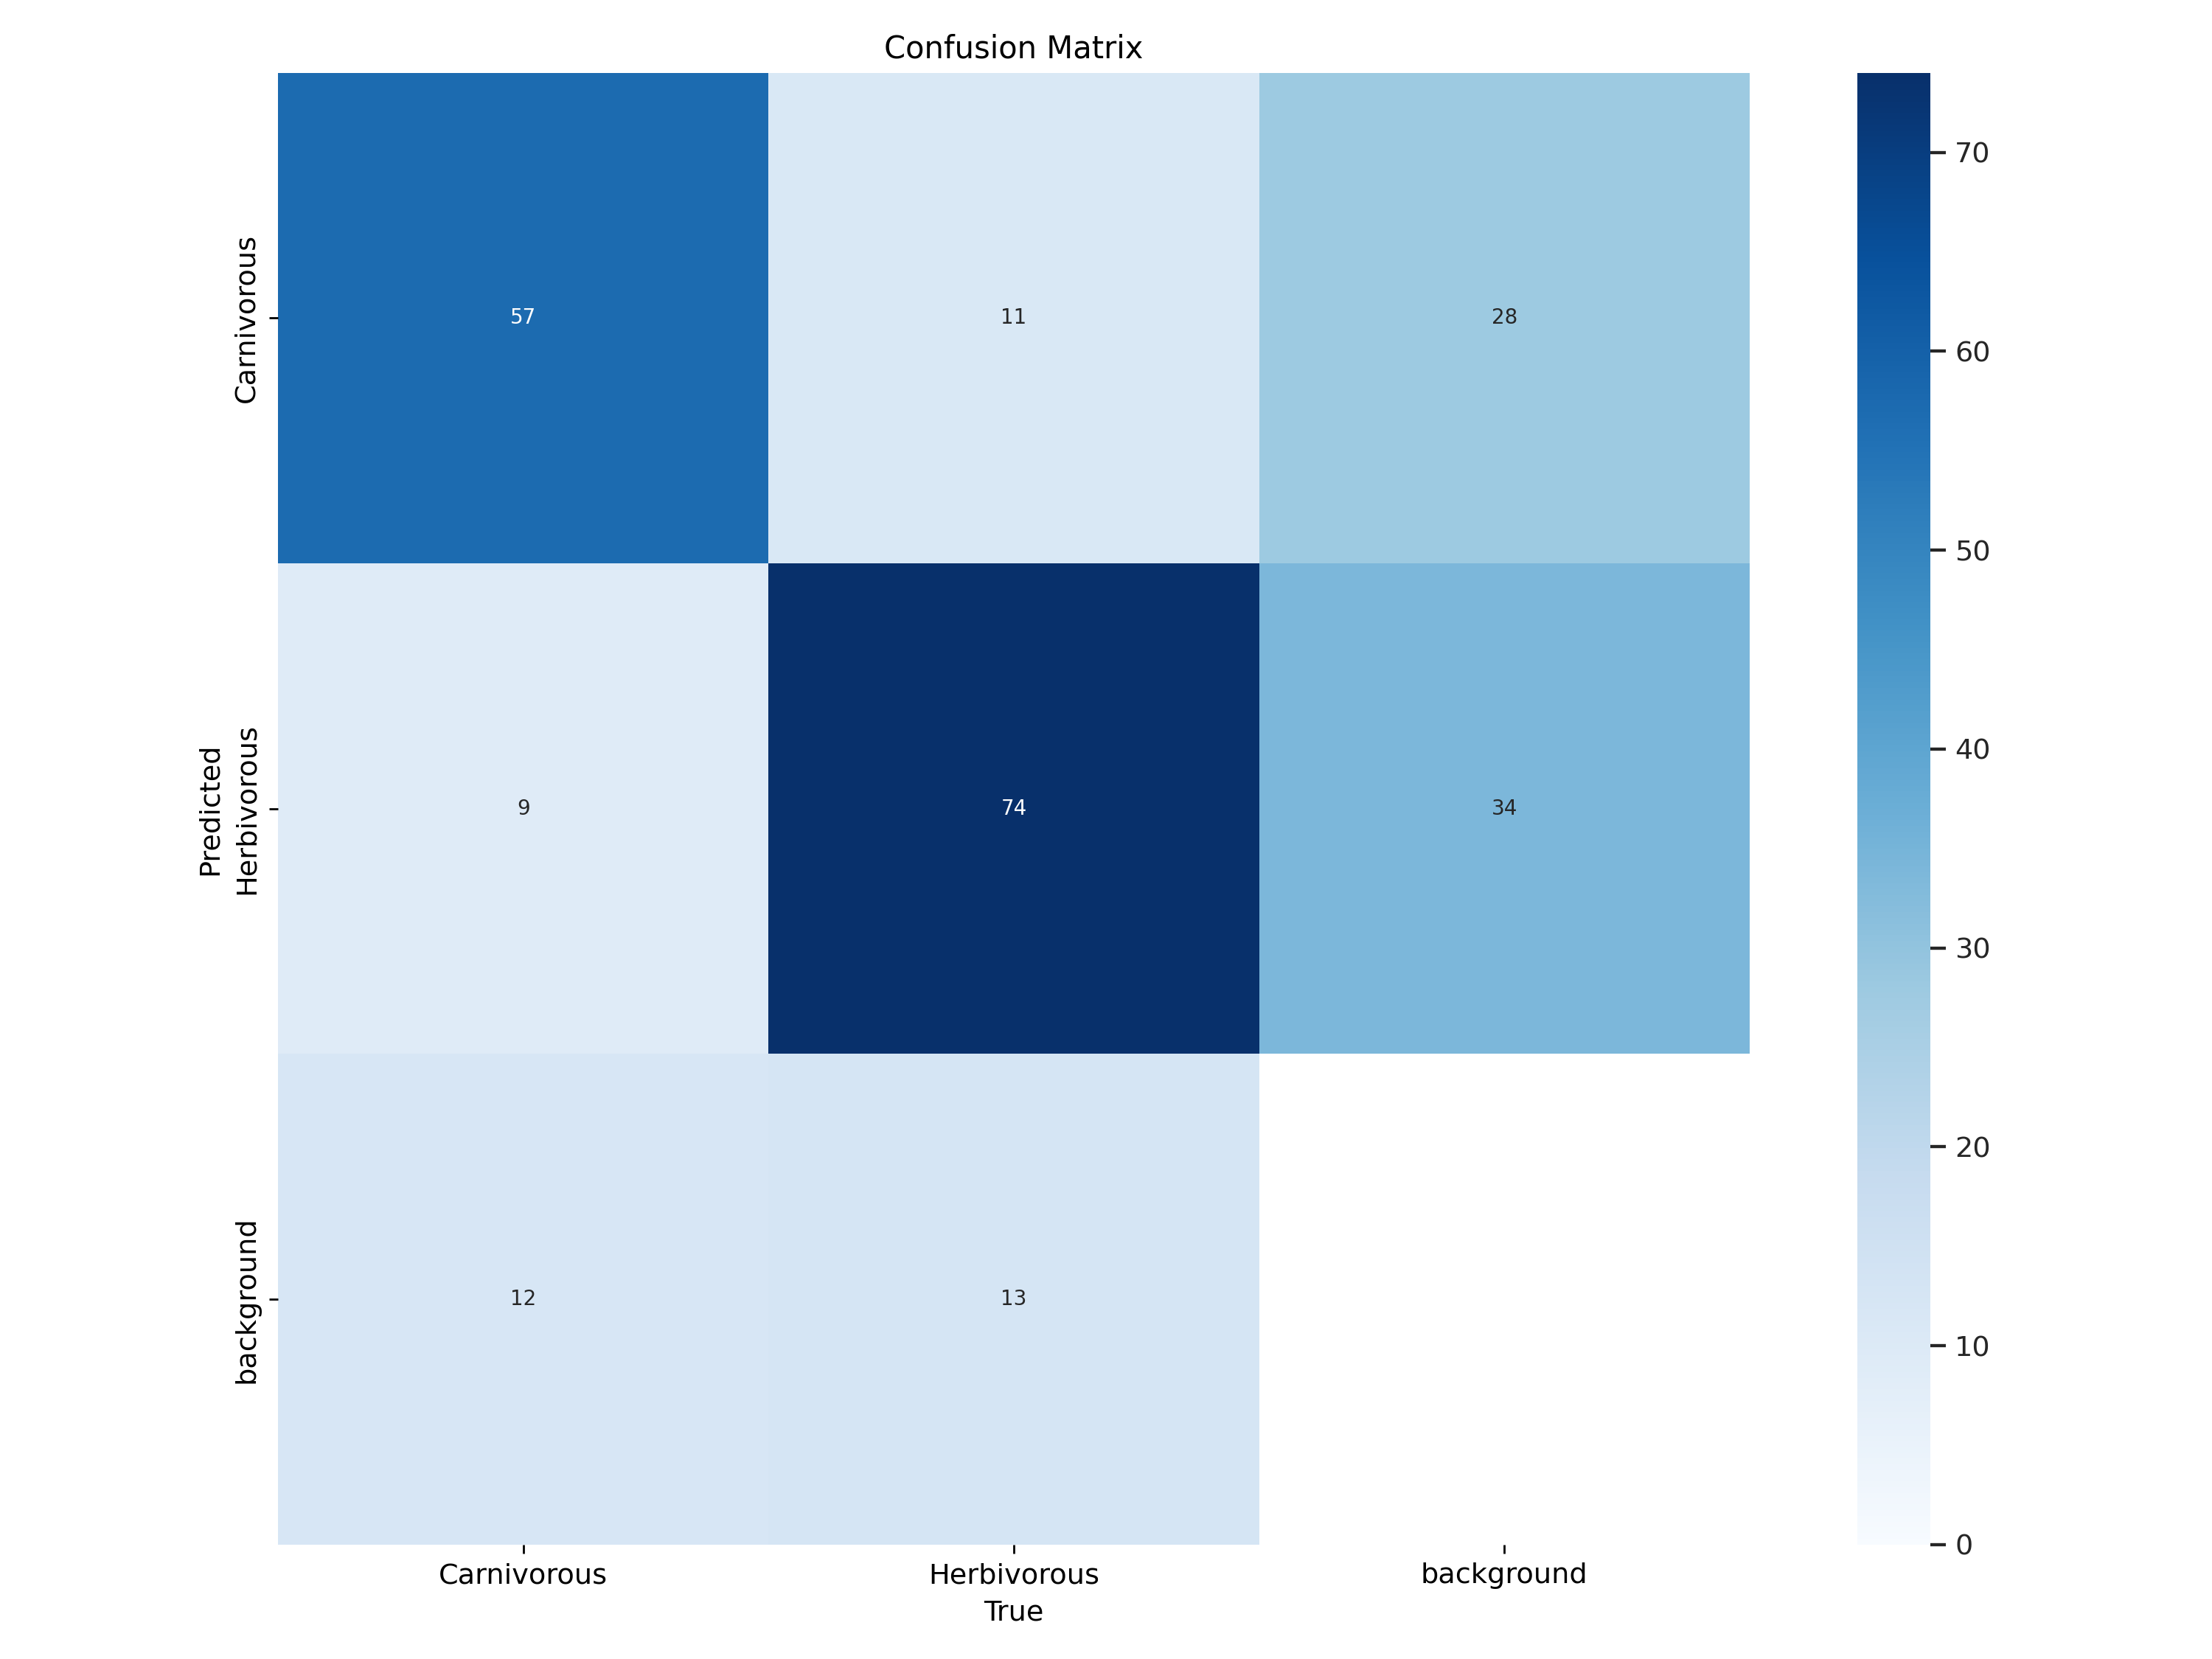

In [9]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

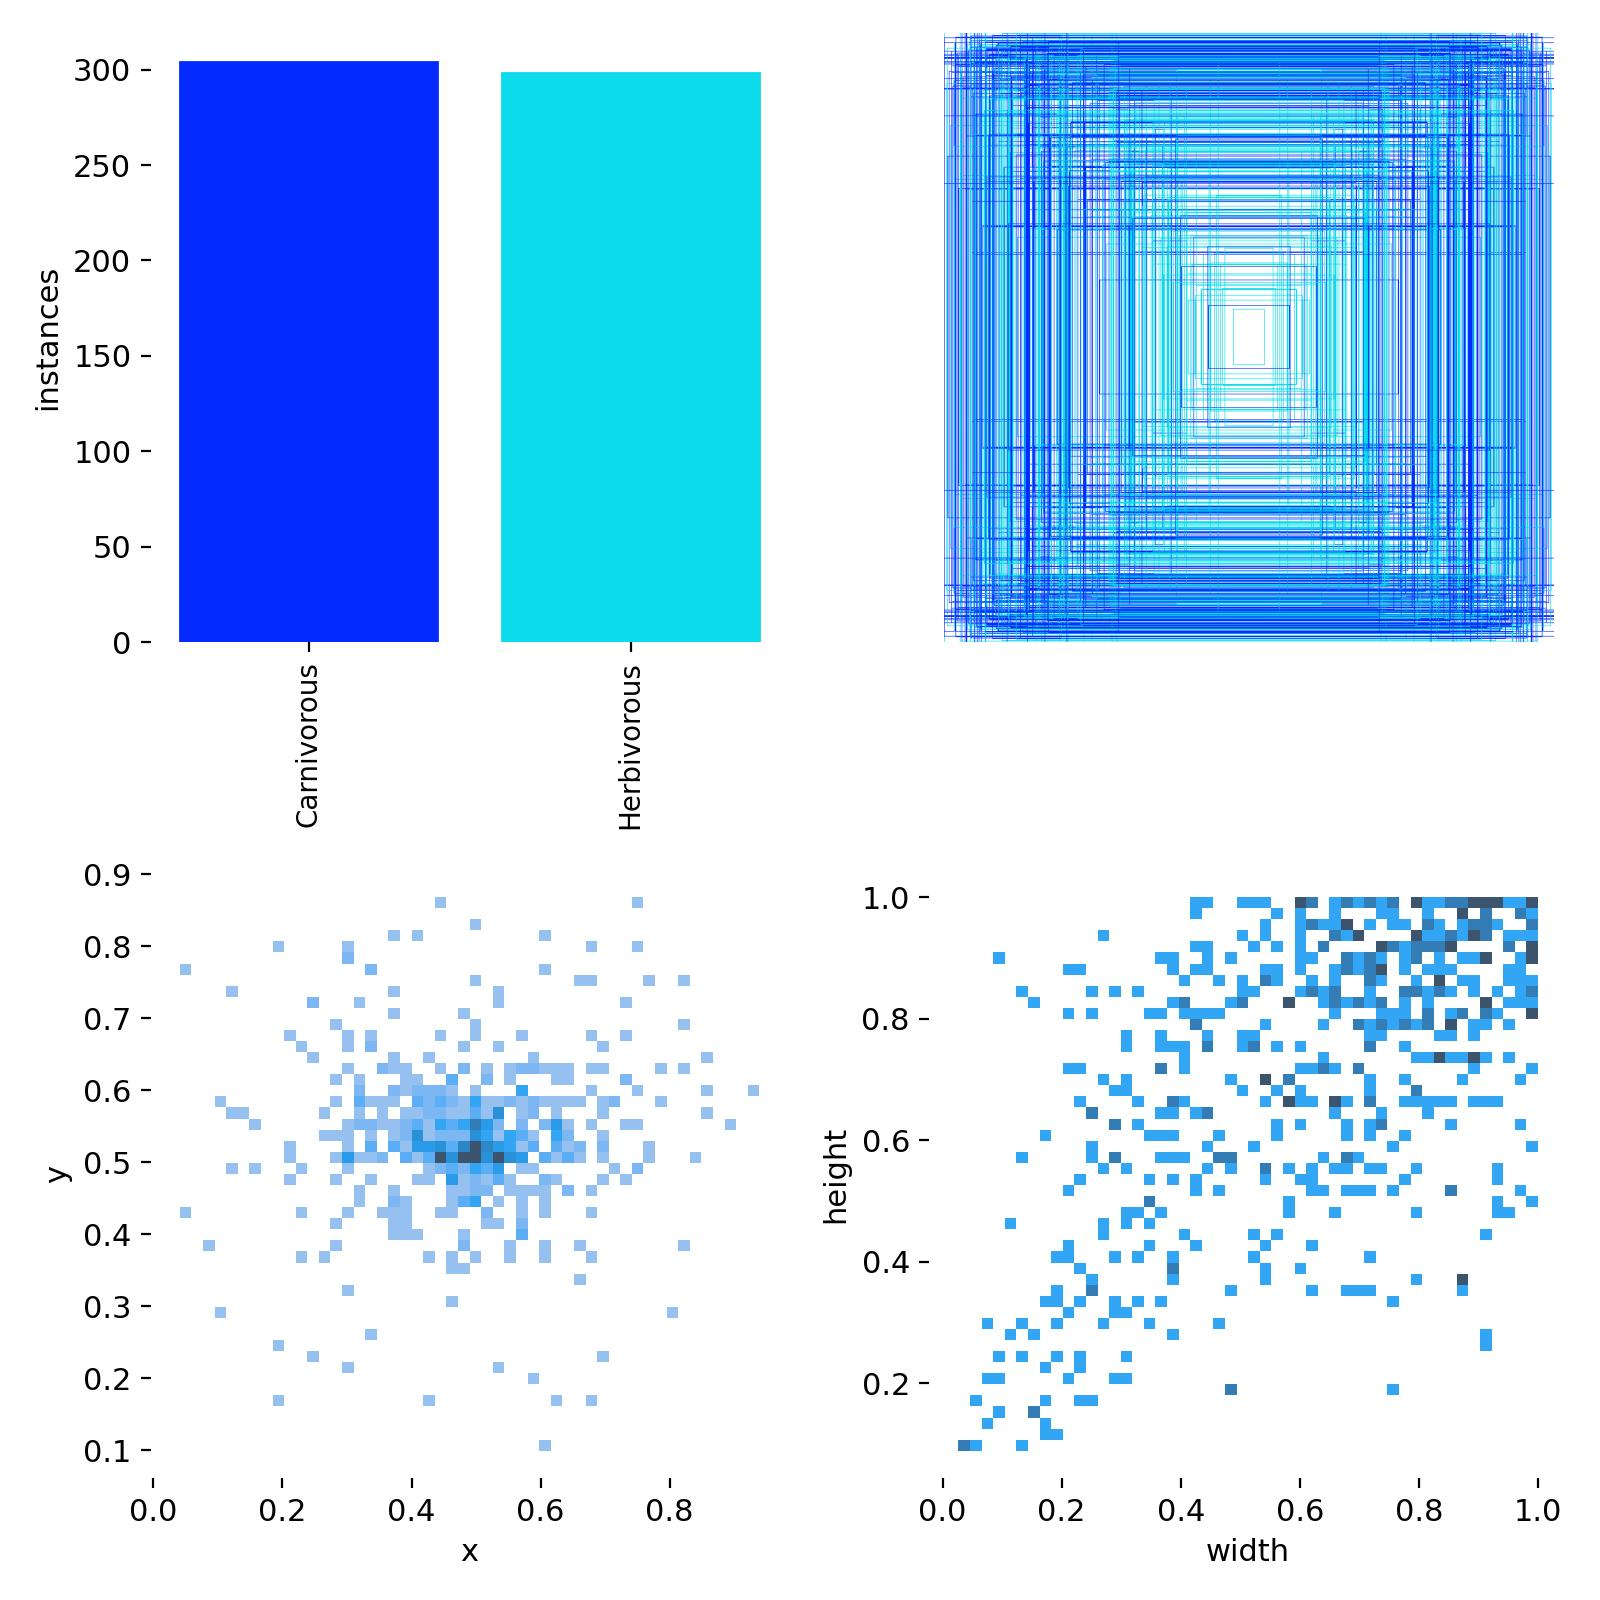

In [10]:
Image("/content/runs/detect/train/labels.jpg", width=600)

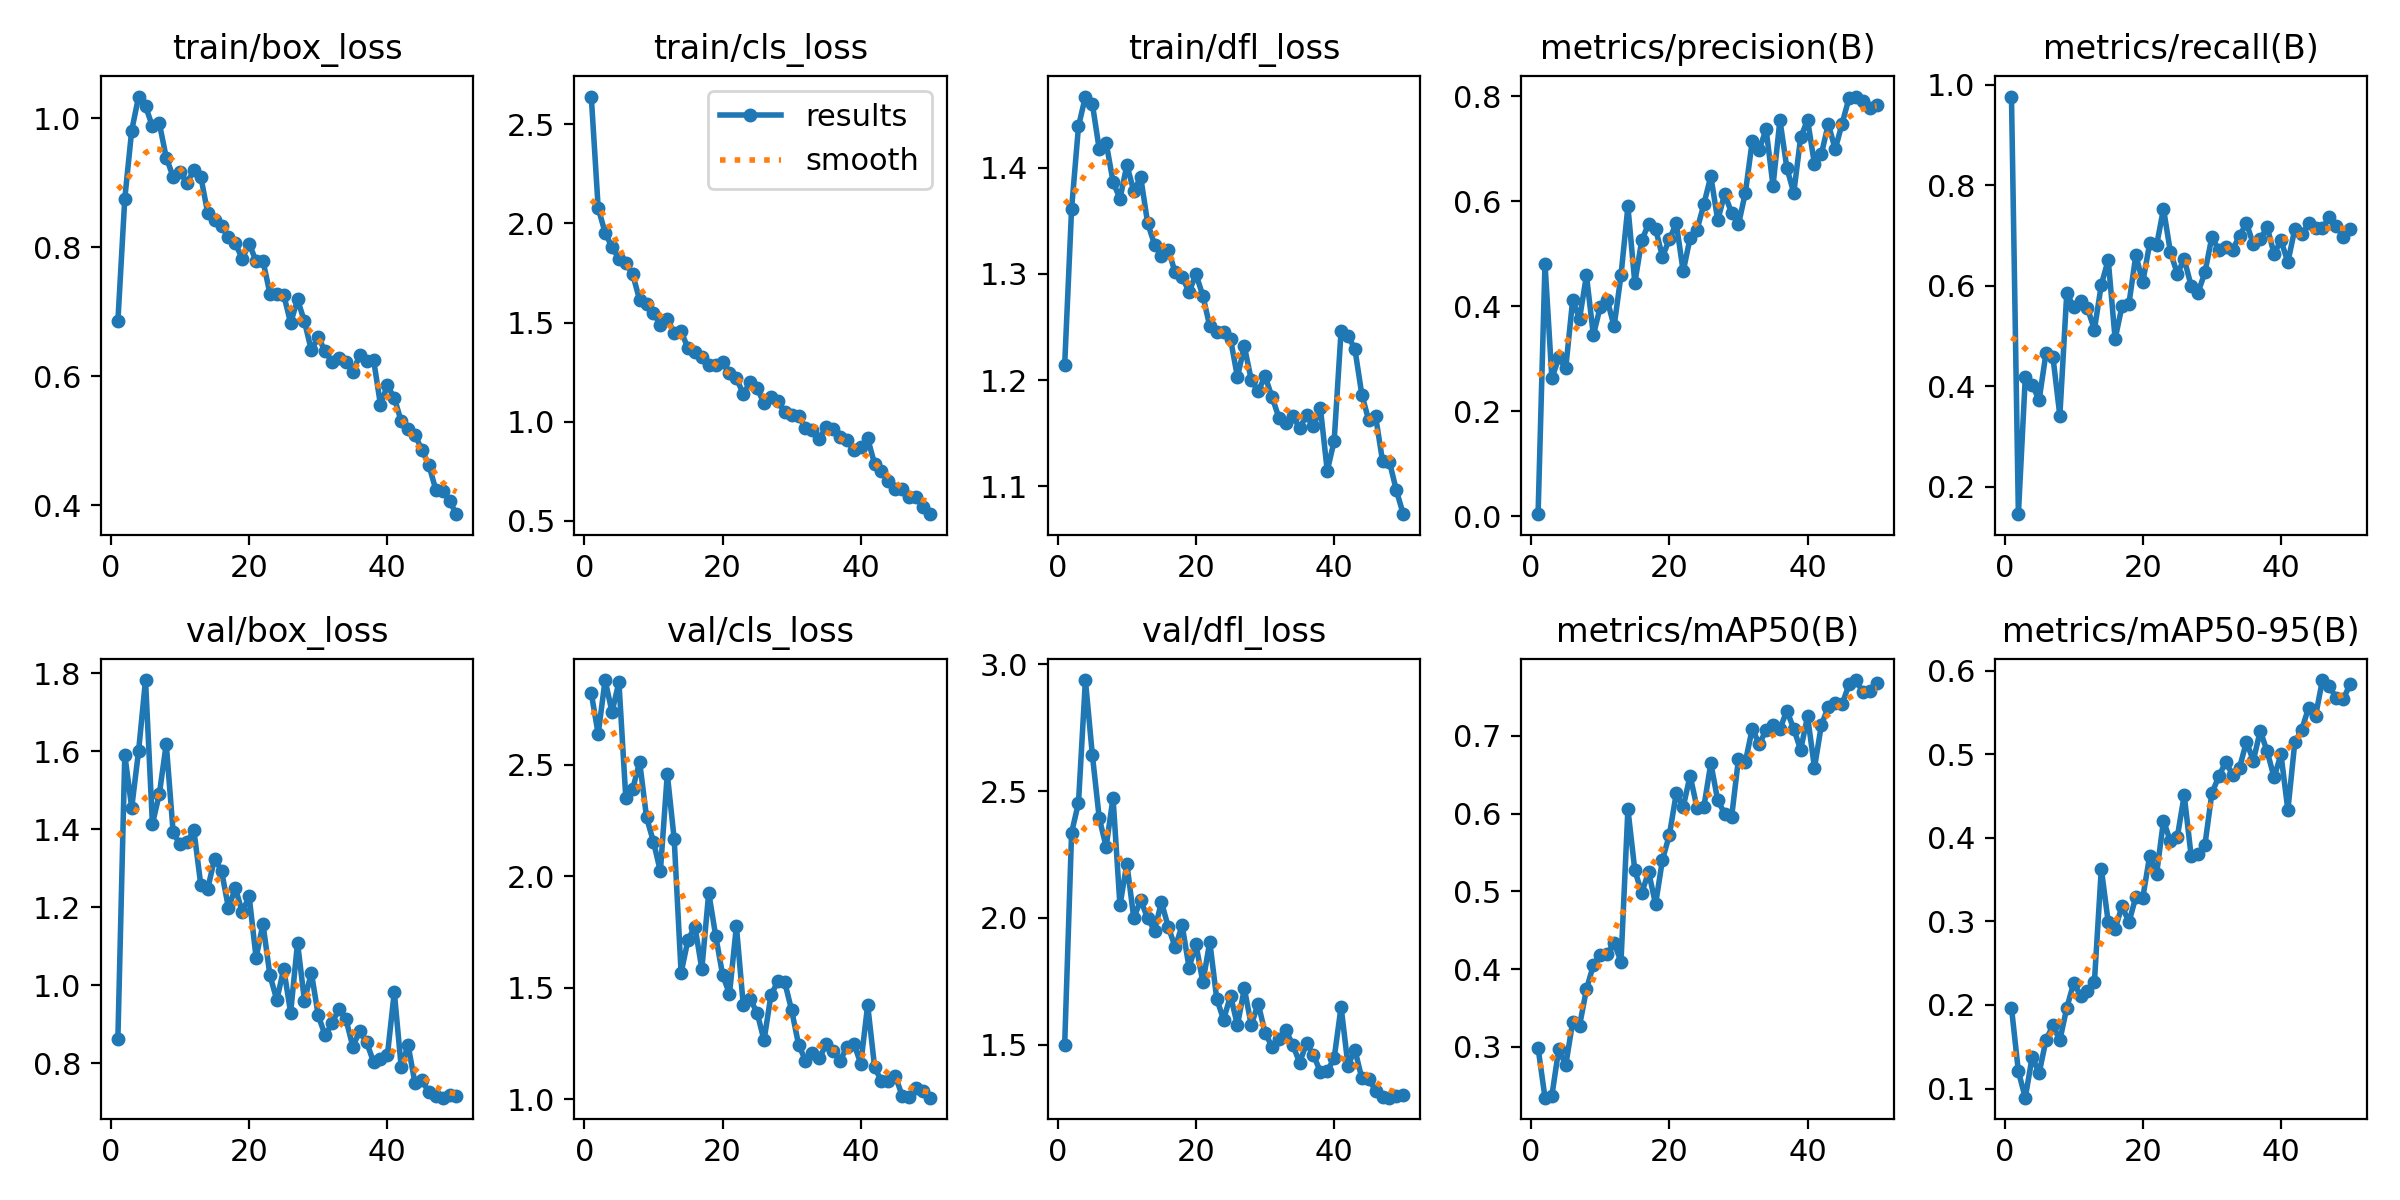

In [11]:
Image("/content/runs/detect/train/results.png", width=600)

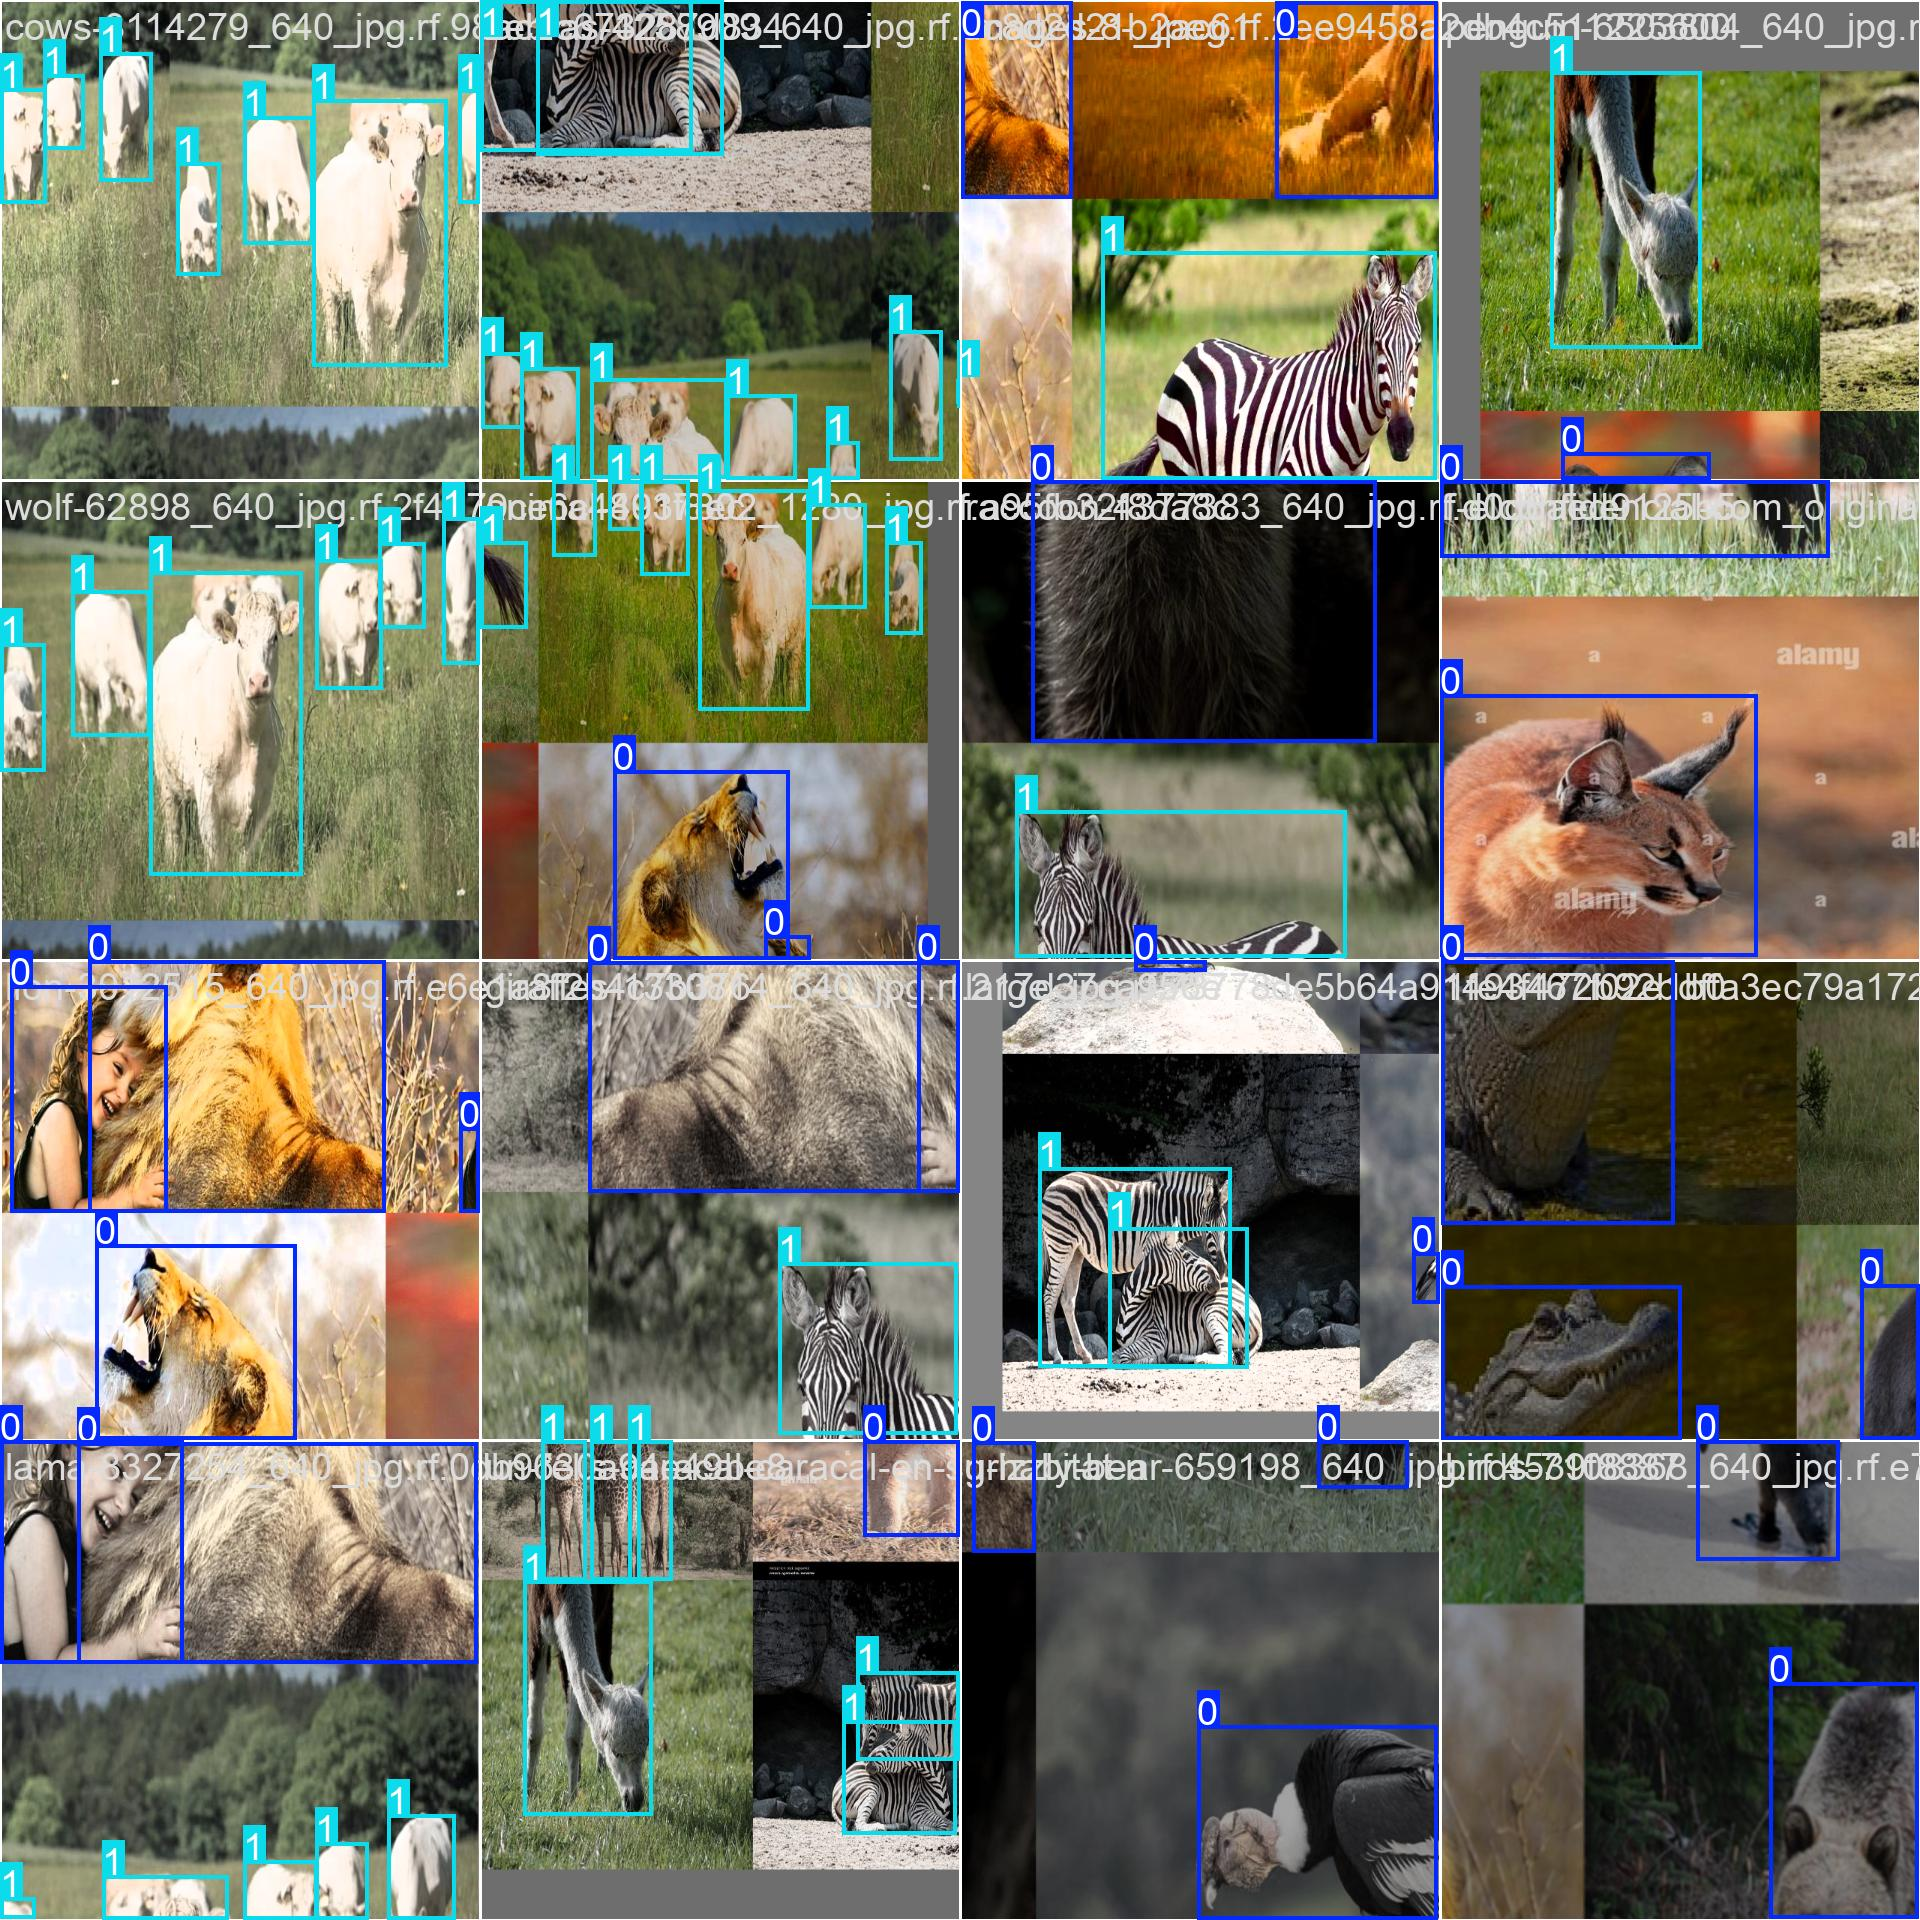

In [12]:
Image("/content/runs/detect/train/train_batch1.jpg", width=600)

In [13]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Carnivore-and-Herbivore-animals-10/valid/labels.cache... 141 images, 1 backgrounds, 0 corrupt: 100% 141/141 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:04<00:00,  2.15it/s]
                   all        141        176      0.796      0.715      0.766      0.589
           Carnivorous         66         78      0.766      0.705      0.766      0.589
           Herbivorous         74         98      0.827      0.724      0.766       0.59
Speed: 5.8ms preprocess, 5.4ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/71 /content/Carnivore-and-Herbivore-animals-10/test/images/08931c07cda2d94ea641f290e51ade86_jpg.rf.c527e8b4c41b162bca1cad8e63dab958.jpg: 640x640 1 Herbivorous, 16.8ms
image 2/71 /content/Carnivore-and-Herbivore-animals-10/test/images/08e473c6d8f4c2c17b6dff4eb5d6532c_jpg.rf.13e8834c0f223d04d4e5d64bd47f294e.jpg: 640x640 1 Carnivorous, 12.7ms
image 3/71 /content/Carnivore-and-Herbivore-animals-10/test/images/0f80224a46128f832ccf1a7a05e94326_jpg.rf.84a54b9a2413664ecd2a5cf9caaa8b7c.jpg: 640x640 1 Herbivorous, 15.6ms
image 4/71 /content/Carnivore-and-Herbivore-animals-10/test/images/205780689-ai-generativa-los-colmillos-de-una-serpiente-vibora-venenosa_jpg.rf.d290666a6958f2bc2405c3818738ff9f.jpg: 640x640 1 Carnivorous, 15.3ms
image 5/71 /content/Carnivore-and-Herbivore-animals-10/test/images/29401a5c4e4666aba4bda12518e57

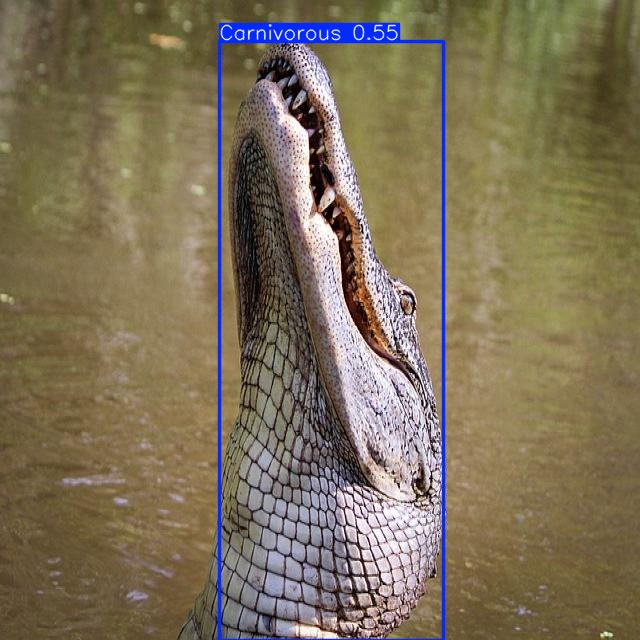

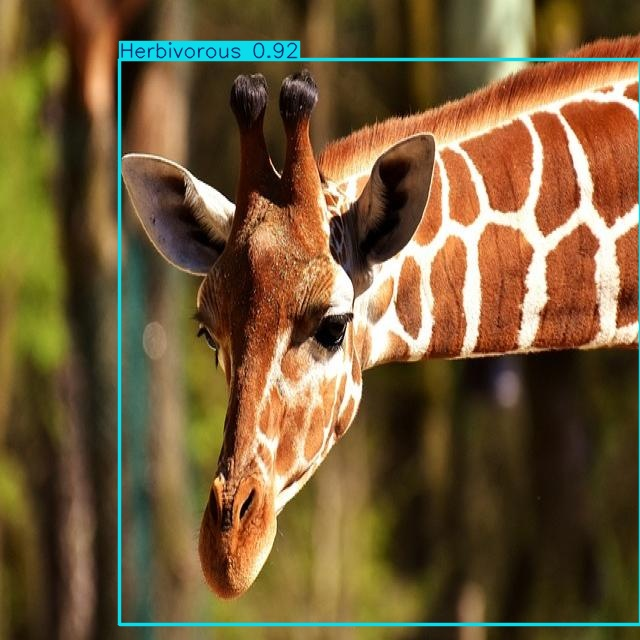

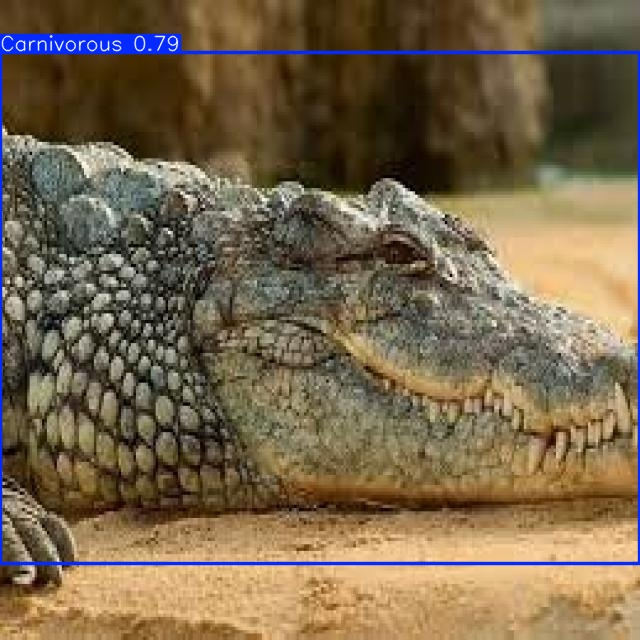

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")